In [4]:
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_style("whitegrid")

sys.path.append('../code/')
import rf_regression as rfr
import plotly.express as px
from scipy import stats
import combat

/Users/anish.simhal/anaconda3/envs/neuro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
# fn = 'data.xlsx' #insert actual data here 

df = pd.read_excel(fn)
df = df[df["MPRAGE"].isin(["pass", "maybe", "fail"])]
df = df[['age', 'site_id', 'MPRAGE', 'REST1', 'FACES1', 'FACES2', 'REST2', 'T2_SPACE', 'DTI']]
df = df.dropna()
df = df.reset_index()

In [6]:
mprage_status = df['MPRAGE'].values
rest1_status = df['REST1'].values
rest2_status = df['REST2'].values
faces1_status = df['FACES1'].values
faces2_status = df['FACES2'].values
t2_status = df['T2_SPACE'].values
dti_status = df['DTI'].values

mprage_status = rfr.get_binary_passfail(mprage_status)
rest1_status = rfr.get_binary_passfail(rest1_status)
rest2_status = rfr.get_binary_passfail(rest2_status)
faces1_status = rfr.get_binary_passfail(faces1_status)
faces2_status = rfr.get_binary_passfail(faces2_status)
t2_status = rfr.get_binary_passfail(t2_status)
dti_status = rfr.get_binary_passfail(dti_status)

faces_status = 1*((faces1_status + faces2_status) > 0)
y_t1 = mprage_status
y_r1 = rest1_status*mprage_status
y_f = faces_status*rest1_status*mprage_status
y_r2 = rest2_status*faces_status*rest1_status*mprage_status
y_t2 = t2_status*rest2_status*faces_status*rest1_status*mprage_status
y_dti = dti_status*t2_status*rest2_status*faces_status*rest1_status*mprage_status

y_regression = y_t1 + y_r1 + y_f + y_r2 + y_t2 + y_dti

In [8]:
age = df['age'].values

In [9]:
min(age)

5.55753424657534

In [10]:
max(age)

11.9687214611872

<IPython.core.display.Javascript object>


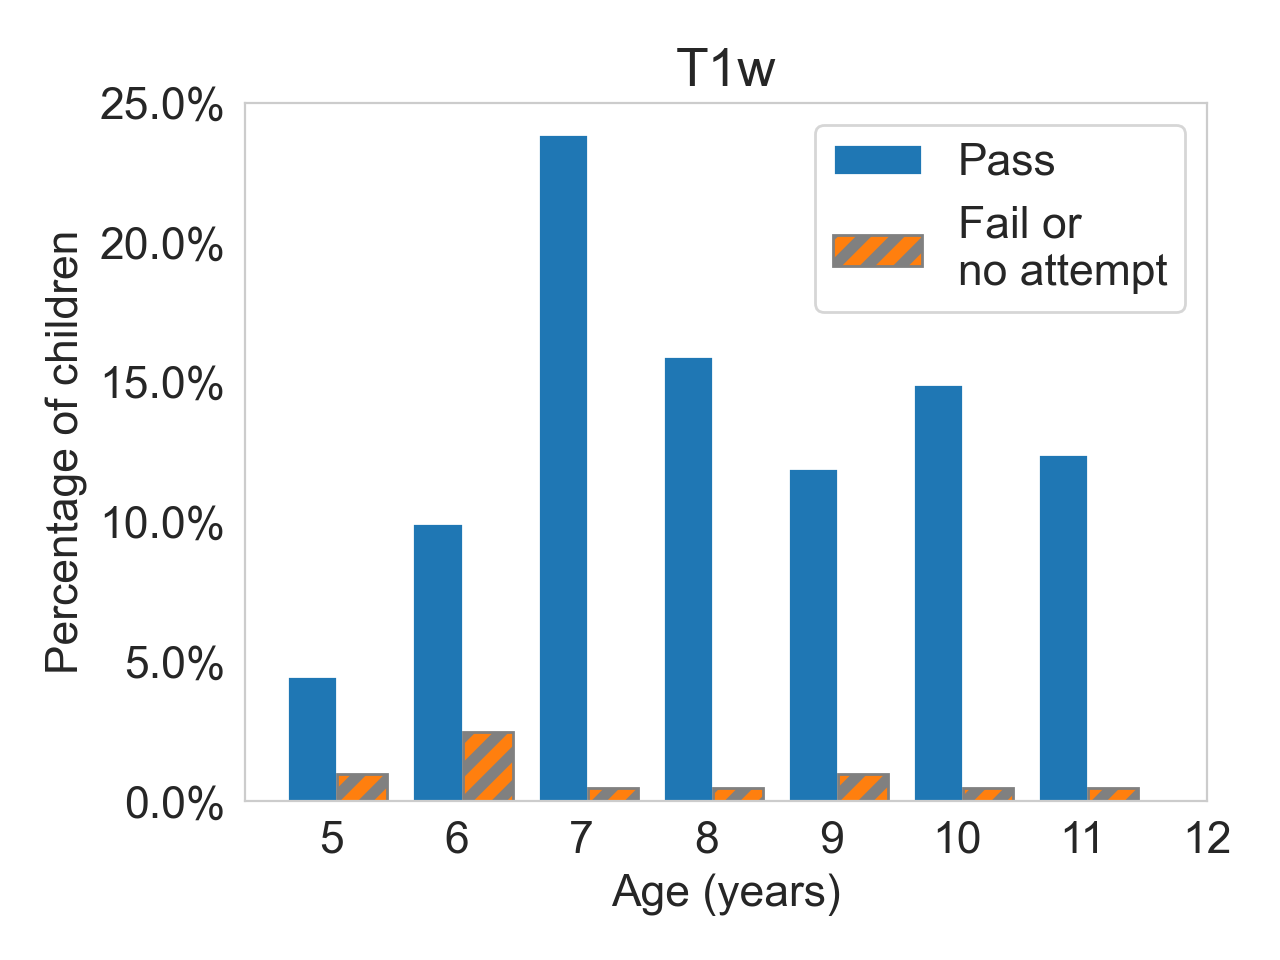

In [13]:
hist_pass, bin_edges = np.histogram(age[y_t1==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_t1==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201

agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)

plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('T1w')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



In [14]:
print(sum(age[y_t1==1]>=9)/sum(age>=9))
print(sum(age[y_t1==1]<9)/sum(age<9))

0.9518072289156626
0.923728813559322


In [15]:
print(sum(age[y_r1==1]>=9)/sum(age>=9))
print(sum(age[y_r1==1]<9)/sum(age<9))

0.9156626506024096
0.7796610169491526


In [16]:
print(sum(age[y_f==1]>=9)/sum(age>=9))
print(sum(age[y_f==1]<9)/sum(age<9))

0.8192771084337349
0.4491525423728814


In [17]:
print(sum(age[y_r2==1]>=9)/sum(age>=9))
print(sum(age[y_r2==1]<9)/sum(age<9))

0.6506024096385542
0.3559322033898305


In [18]:
print(sum(age[y_t2==1]>=9)/sum(age>=9))
print(sum(age[y_t2==1]<9)/sum(age<9))

0.5060240963855421
0.17796610169491525


In [19]:
print(sum(age[y_dti==1]>=9)/sum(age>=9))
print(sum(age[y_dti==1]<9)/sum(age<9))

0.20481927710843373
0.025423728813559324


<IPython.core.display.Javascript object>


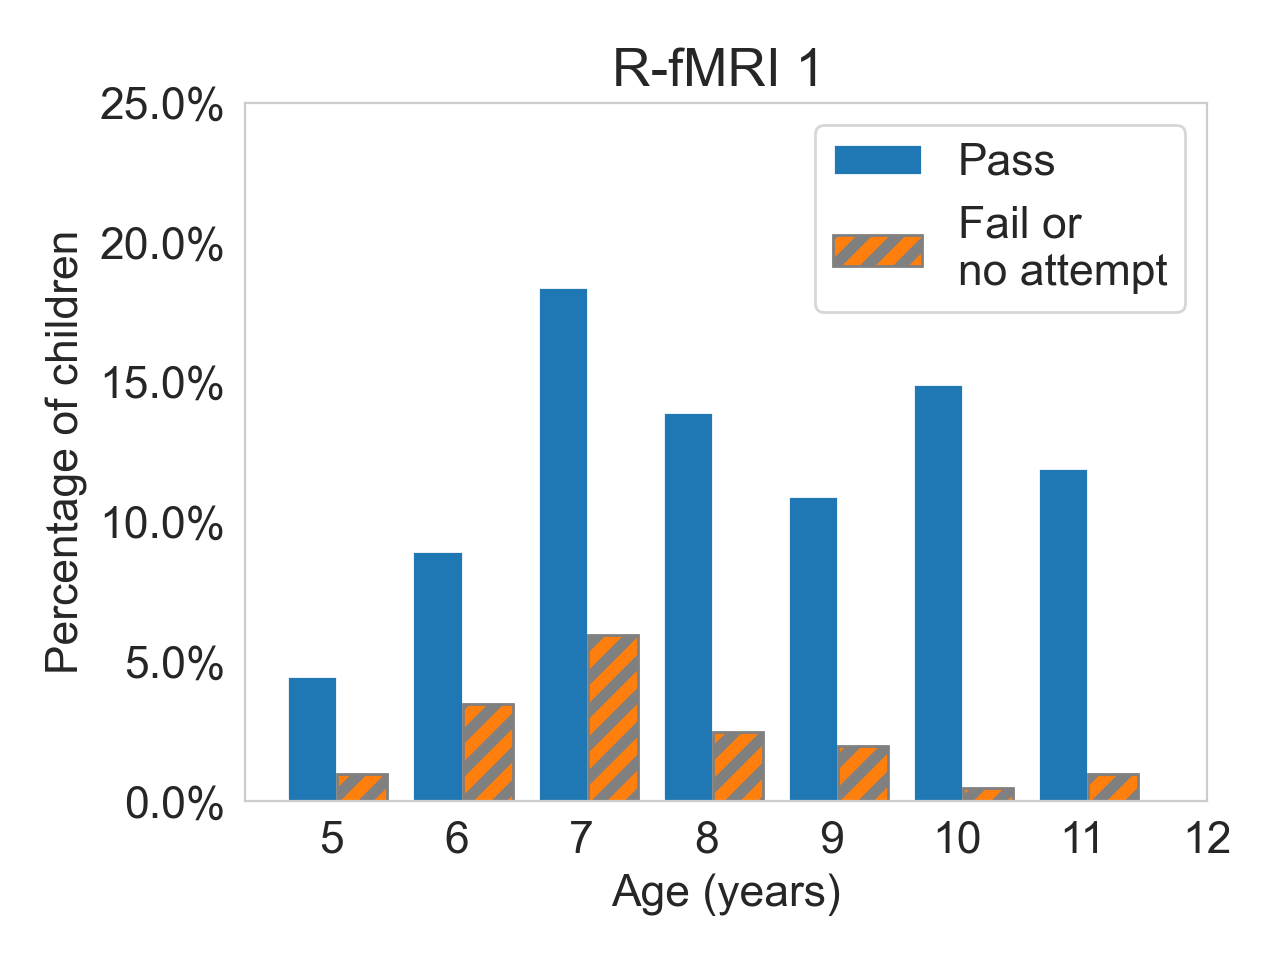

In [20]:
hist_pass, bin_edges = np.histogram(age[y_r1==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_r1==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201

agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)


plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('R-fMRI 1 ')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


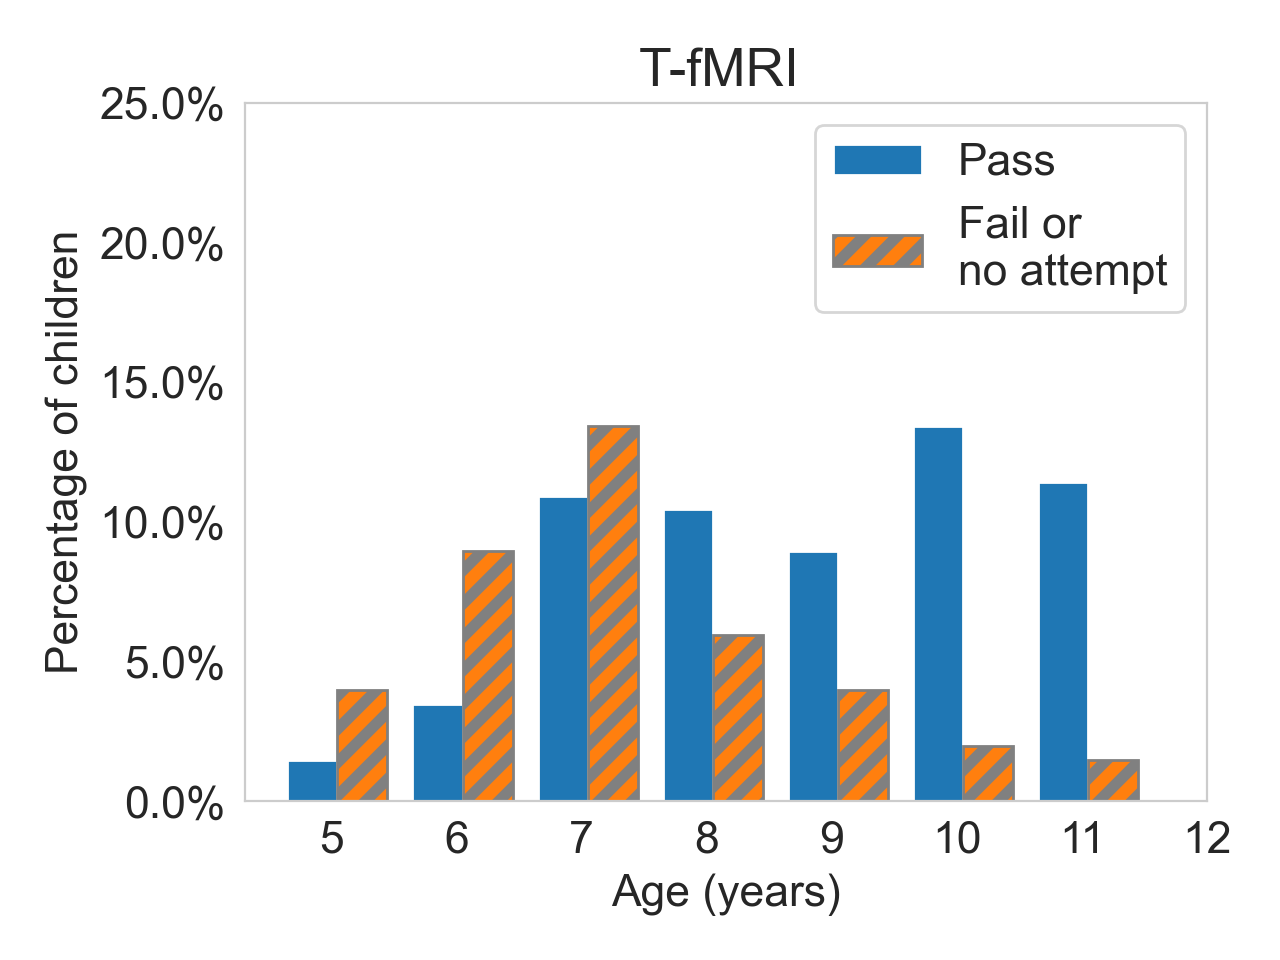

In [21]:
hist_pass, bin_edges = np.histogram(age[y_f==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_f==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201

agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)

plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('T-fMRI ')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


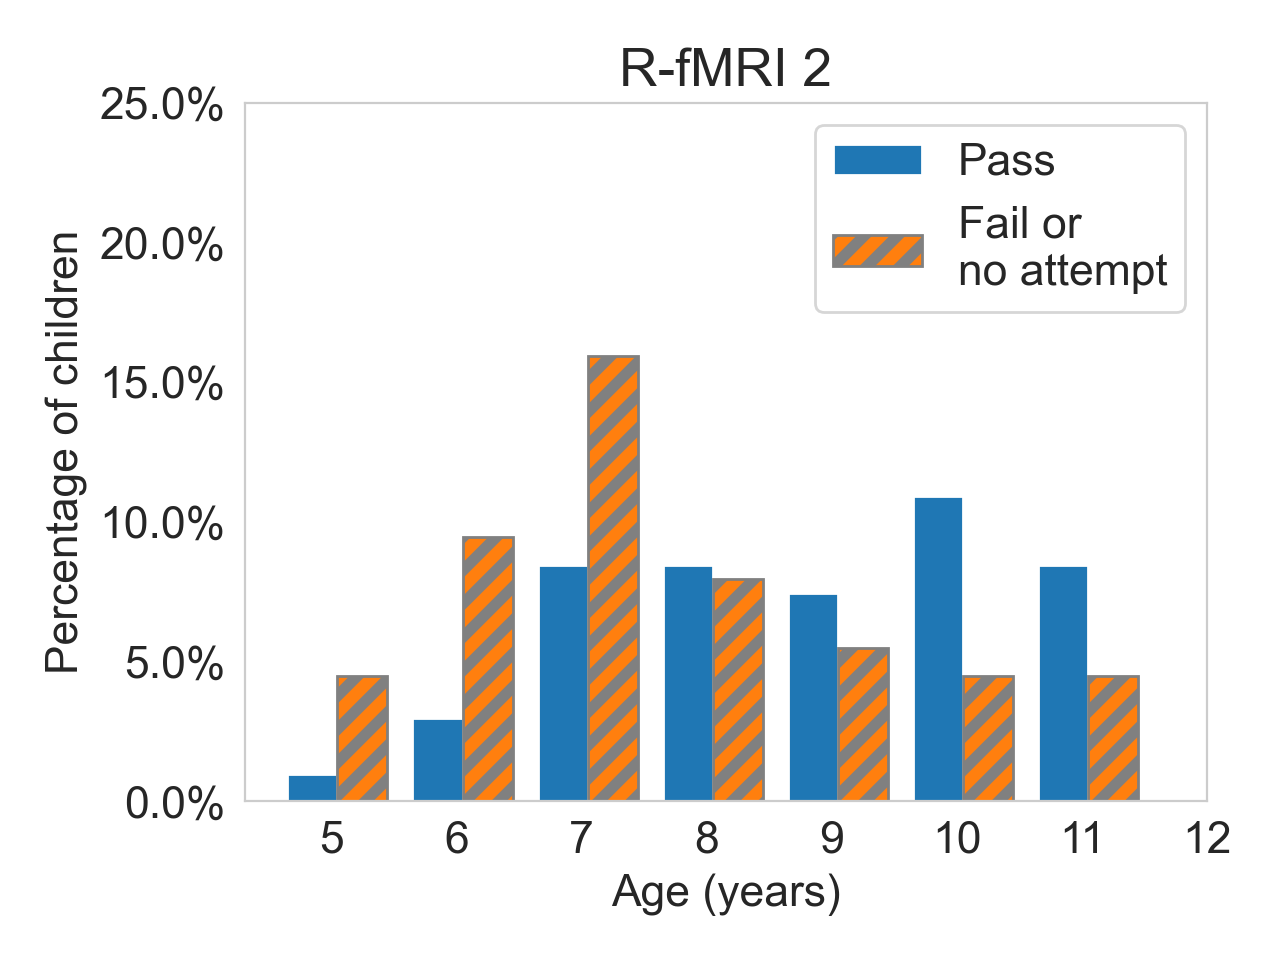

In [22]:
hist_pass, bin_edges = np.histogram(age[y_r2==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_r2==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201

agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)

plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('R-fMRI 2')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


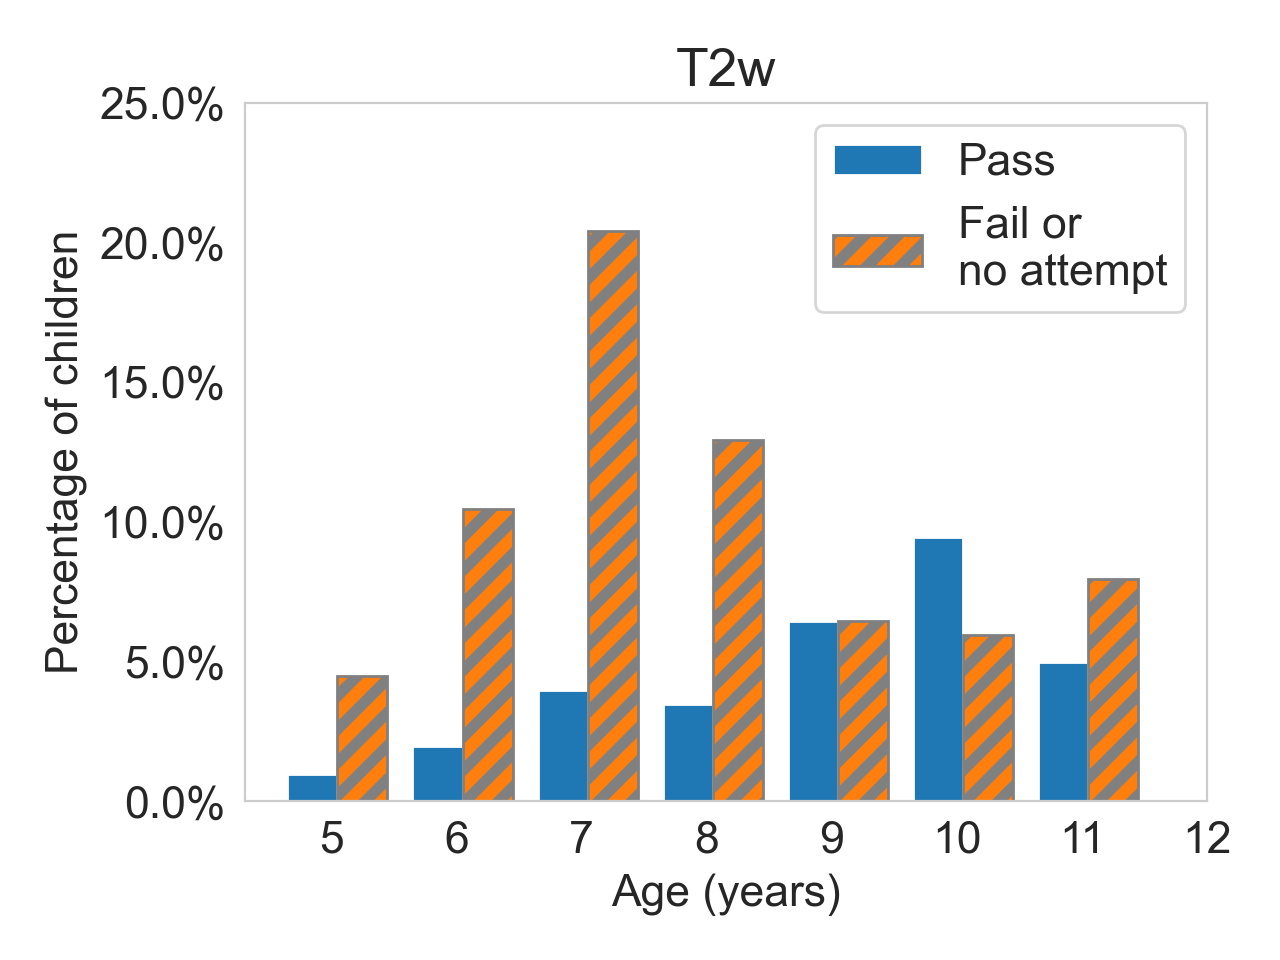

In [23]:
hist_pass, bin_edges = np.histogram(age[y_t2==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_t2==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201


agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)


plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('T2w')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


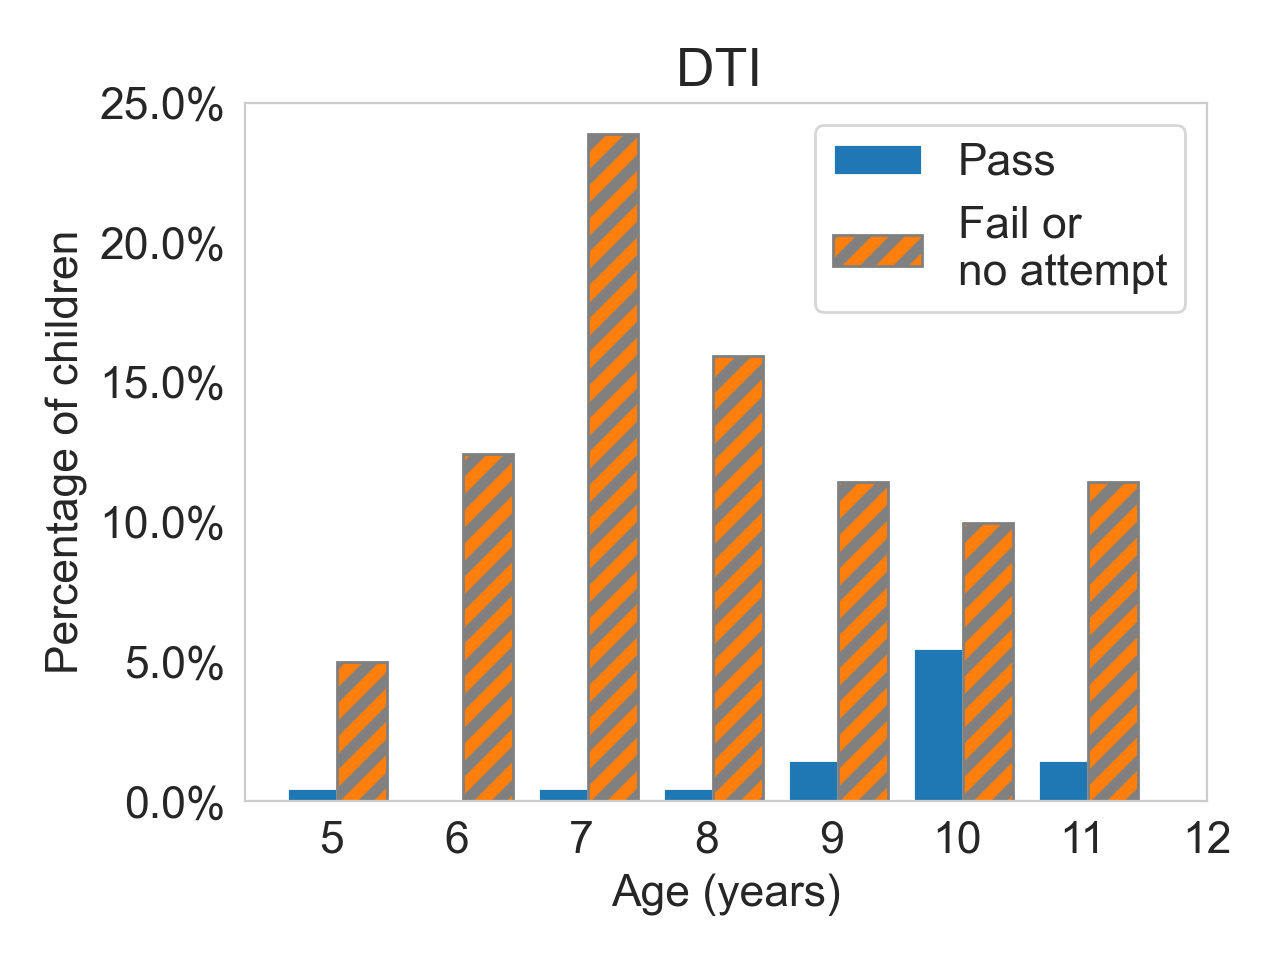

In [24]:
hist_pass, bin_edges = np.histogram(age[y_dti==1], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_pass = hist_pass / 201
hist_fail, bin_edges = np.histogram(age[y_dti==0], bins=(5, 6, 7, 8, 9, 10, 11, 12))
hist_fail = hist_fail / 201

agex = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])-0.65

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 25)
ax.grid(False)

plt.legend(['Pass', 'Fail or\nno attempt'])
plt.title('DTI ')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

